In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline

In [2]:
# Loading the dataframe
dataset = '10K_accts_super_easy_prepro2'
banks = os.listdir(f'../datasets/{dataset}')
banks = [bank.split('.')[0] for bank in banks]
#banks = ['ålandsbanken', 'danske', 'handelsbanken', 'ica', 'länsförsäkringar', 'marginalen', 'nodrea', 'seb', 'skandia', 'spabanken', 'svea', 'swedbank']
#banks = ['danske', 'handelsbanken', 'ica', 'länsförsäkringar', 'marginalen', 'nodrea', 'seb', 'skandia', 'sparbanken', 'svea']
df = pd.DataFrame()
for bank in banks:
    df = pd.concat([df, pd.read_csv(f'../datasets/{dataset}/{bank}.csv')])
print(df['account'].shape[0])
print(df['account'].nunique())
df.drop(columns='account', inplace=True)
display(df.head())

7546
7522


,num_incoming_txs_1_366,sum_incoming_txs_1_366,num_outgoing_txs_1_366,sum_outgoing_txs_1_366,num_txs_1_366,sum_txs_1_366,num_unique_counterparties_1_366,num_incoming_txs_1_183,sum_incoming_txs_1_183,num_outgoing_txs_1_183,...,num_incoming_txs_184_366,sum_incoming_txs_184_366,num_outgoing_txs_184_366,sum_outgoing_txs_184_366,num_txs_184_366,sum_txs_184_366,num_unique_counterparties_184_366,num_phone_changes,num_days_in_bank,is_sar
0,2.0,188.78,3.0,292.25,5.0,481.03,2.0,0.0,0.00,0.0,...,2.0,188.78,3.0,292.25,5.0,481.03,2.0,0.0,33.0,0.0
1,1.0,90.76,6.0,563.92,7.0,654.68,2.0,0.0,0.00,1.0,...,1.0,90.76,5.0,468.18,6.0,558.94,2.0,0.0,362.0,0.0
2,1.0,96.98,10.0,958.89,11.0,1055.87,1.0,0.0,0.00,1.0,...,1.0,96.98,9.0,861.91,10.0,958.89,1.0,0.0,366.0,0.0
3,1.0,96.20,5.0,466.22,6.0,562.42,2.0,0.0,0.00,0.0,...,1.0,96.20,5.0,466.22,6.0,562.42,2.0,0.0,364.0,0.0
4,2.0,196.61,20.0,1853.81,22.0,2050.42,2.0,1.0,104.17,8.0,...,1.0,92.44,12.0,1104.06,13.0,1196.50,1.0,0.0,358.0,0.0


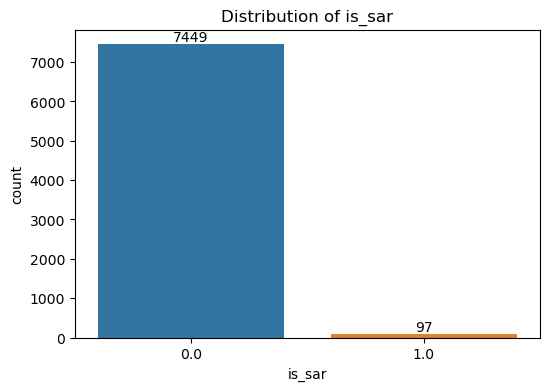

In [3]:
# Data distribution of the label 'is_sar'
plt.figure(figsize=(6,4))
ax = sns.countplot(data=df, x='is_sar', )
ax.bar_label(ax.containers[0])
plt.title('Distribution of is_sar')
plt.show()

In [4]:
# Summary statistics of the dataframe
display(df.describe())

,num_incoming_txs_1_366,sum_incoming_txs_1_366,num_outgoing_txs_1_366,sum_outgoing_txs_1_366,num_txs_1_366,sum_txs_1_366,num_unique_counterparties_1_366,num_incoming_txs_1_183,sum_incoming_txs_1_183,num_outgoing_txs_1_183,...,num_incoming_txs_184_366,sum_incoming_txs_184_366,num_outgoing_txs_184_366,sum_outgoing_txs_184_366,num_txs_184_366,sum_txs_184_366,num_unique_counterparties_184_366,num_phone_changes,num_days_in_bank,is_sar
count,7546.000000,7546.000000,7546.000000,7546.000000,7546.000000,7546.000000,7546.000000,7546.000000,7546.000000,7546.00000,...,7546.000000,7546.000000,7546.000000,7546.000000,7546.000000,7546.000000,7546.000000,7546.000000,7546.000000,7546.000000
mean,6.947654,817.639685,6.946329,814.874218,13.893984,1632.513903,2.693347,1.568116,242.031667,1.56679,...,5.349854,572.644824,5.349854,573.943566,10.699708,1146.588390,2.340180,0.009011,350.393056,0.012854
std,17.972914,2687.027059,14.447534,2052.455507,23.268728,3552.908475,4.518754,5.729182,1749.404887,5.14478,...,13.506498,1583.774647,10.847447,1339.749866,17.387951,2165.204409,3.629964,0.097270,29.083464,0.112654
min,0.000000,0.000000,0.000000,0.000000,1.000000,70.920000,1.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000
25%,1.000000,99.890000,2.000000,191.045000,6.000000,604.907500,2.000000,0.000000,0.000000,0.00000,...,1.000000,92.905000,1.000000,110.995000,5.000000,449.172500,1.000000,0.000000,348.000000,0.000000
50%,2.000000,190.310000,5.000000,504.475000,7.000000,734.445000,2.000000,0.000000,0.000000,1.00000,...,1.000000,113.550000,4.000000,385.870000,6.000000,591.440000,2.000000,0.000000,359.000000,0.000000
75%,6.000000,609.692500,6.000000,653.425000,12.000000,1263.837500,2.000000,1.000000,115.025000,2.00000,...,5.000000,493.005000,5.000000,527.025000,9.000000,966.995000,2.000000,0.000000,364.000000,0.000000
max,350.000000,61245.320000,315.000000,40047.500000,393.000000,62361.700000,62.000000,189.000000,60947.330000,177.00000,...,243.000000,30064.990000,185.000000,30556.400000,263.000000,50550.750000,48.000000,2.000000,366.000000,1.000000


In [5]:
# Check for any missing values
print("\nMissing values:")
for col in df.columns:
    l = []
    if df[col].isnull().sum() > 0:
        l.append('%s: %i' % (col, df[col].isnull().sum()))
if l == []:
    print("\nNo missing values found.")
else:
    print(l)


Missing values:

No missing values found.


In [6]:
#features = df.columns[:-1]  # excluding the 'is_sar' column
#rows = 15
#cols = 3
#
#fig, axes = plt.subplots(rows, cols, figsize=(20, 40))  # Adjust figsize for appropriate display
#
#for idx, feature in enumerate(features):
#    row_idx = idx // cols
#    col_idx = idx % cols
#    sns.histplot(data=df, x=feature, hue='is_sar', element="step", stat="count", common_norm=False, ax=axes[row_idx, col_idx])
#    #axes[row_idx, col_idx].set_title(f'{feature}')
#    if row_idx < 11:
#        axes[row_idx, col_idx].set_xscale('log')
#        axes[row_idx, col_idx].set_yscale('linear')
#    else:
#        axes[row_idx, col_idx].set_xscale('linear')
#        axes[row_idx, col_idx].set_yscale('linear')
#
#fig.suptitle('Distribution of features by is_sar', fontsize=16)
#plt.tight_layout(pad=3)
#plt.show()

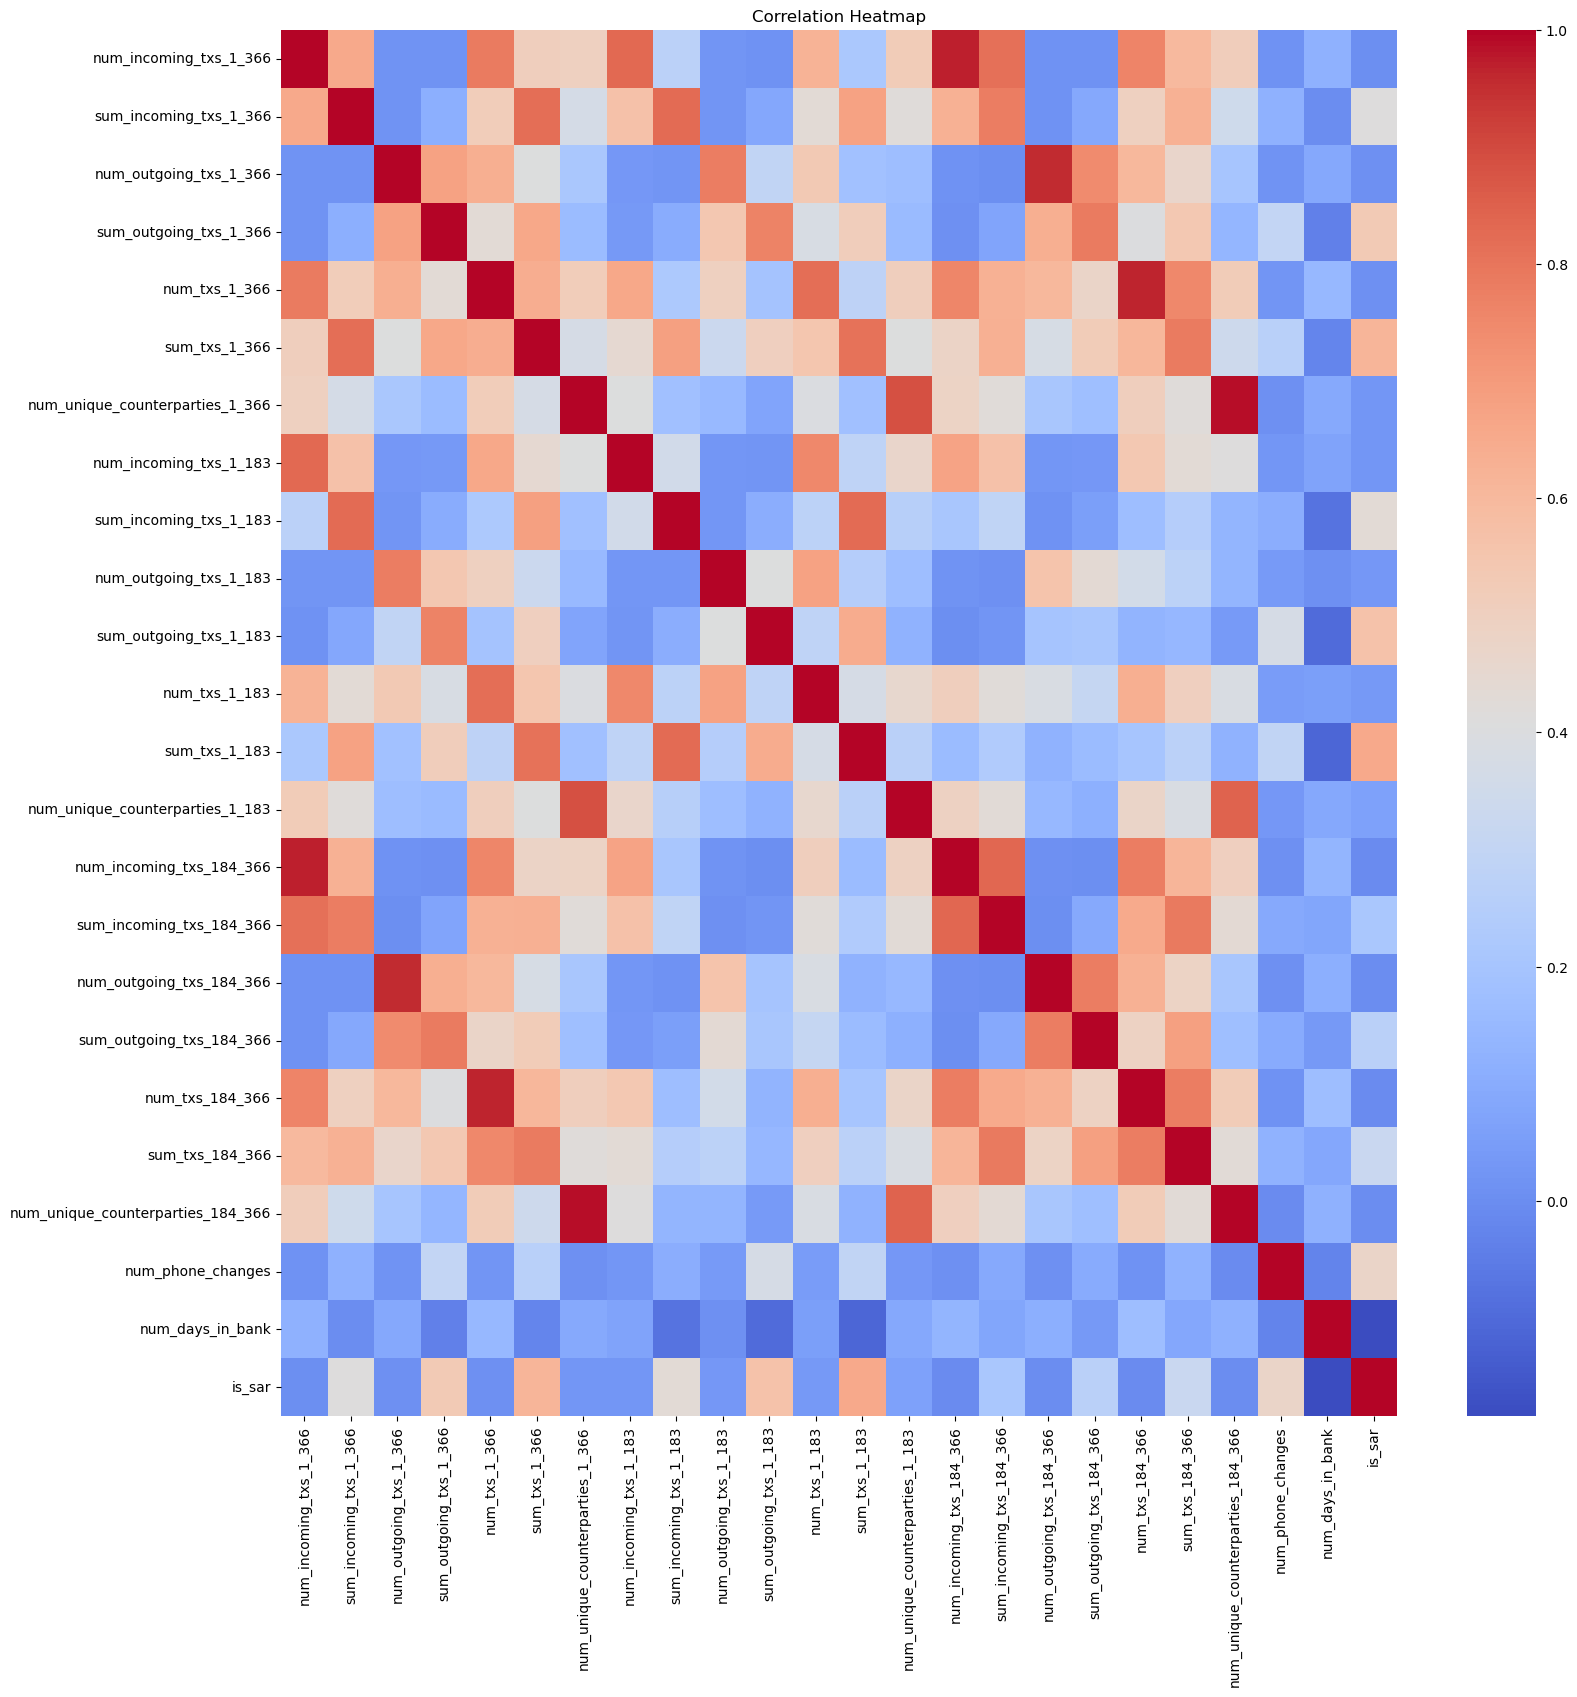

In [7]:
# Checking correlations
corr = df.corr()
plt.figure(figsize=(18,18))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

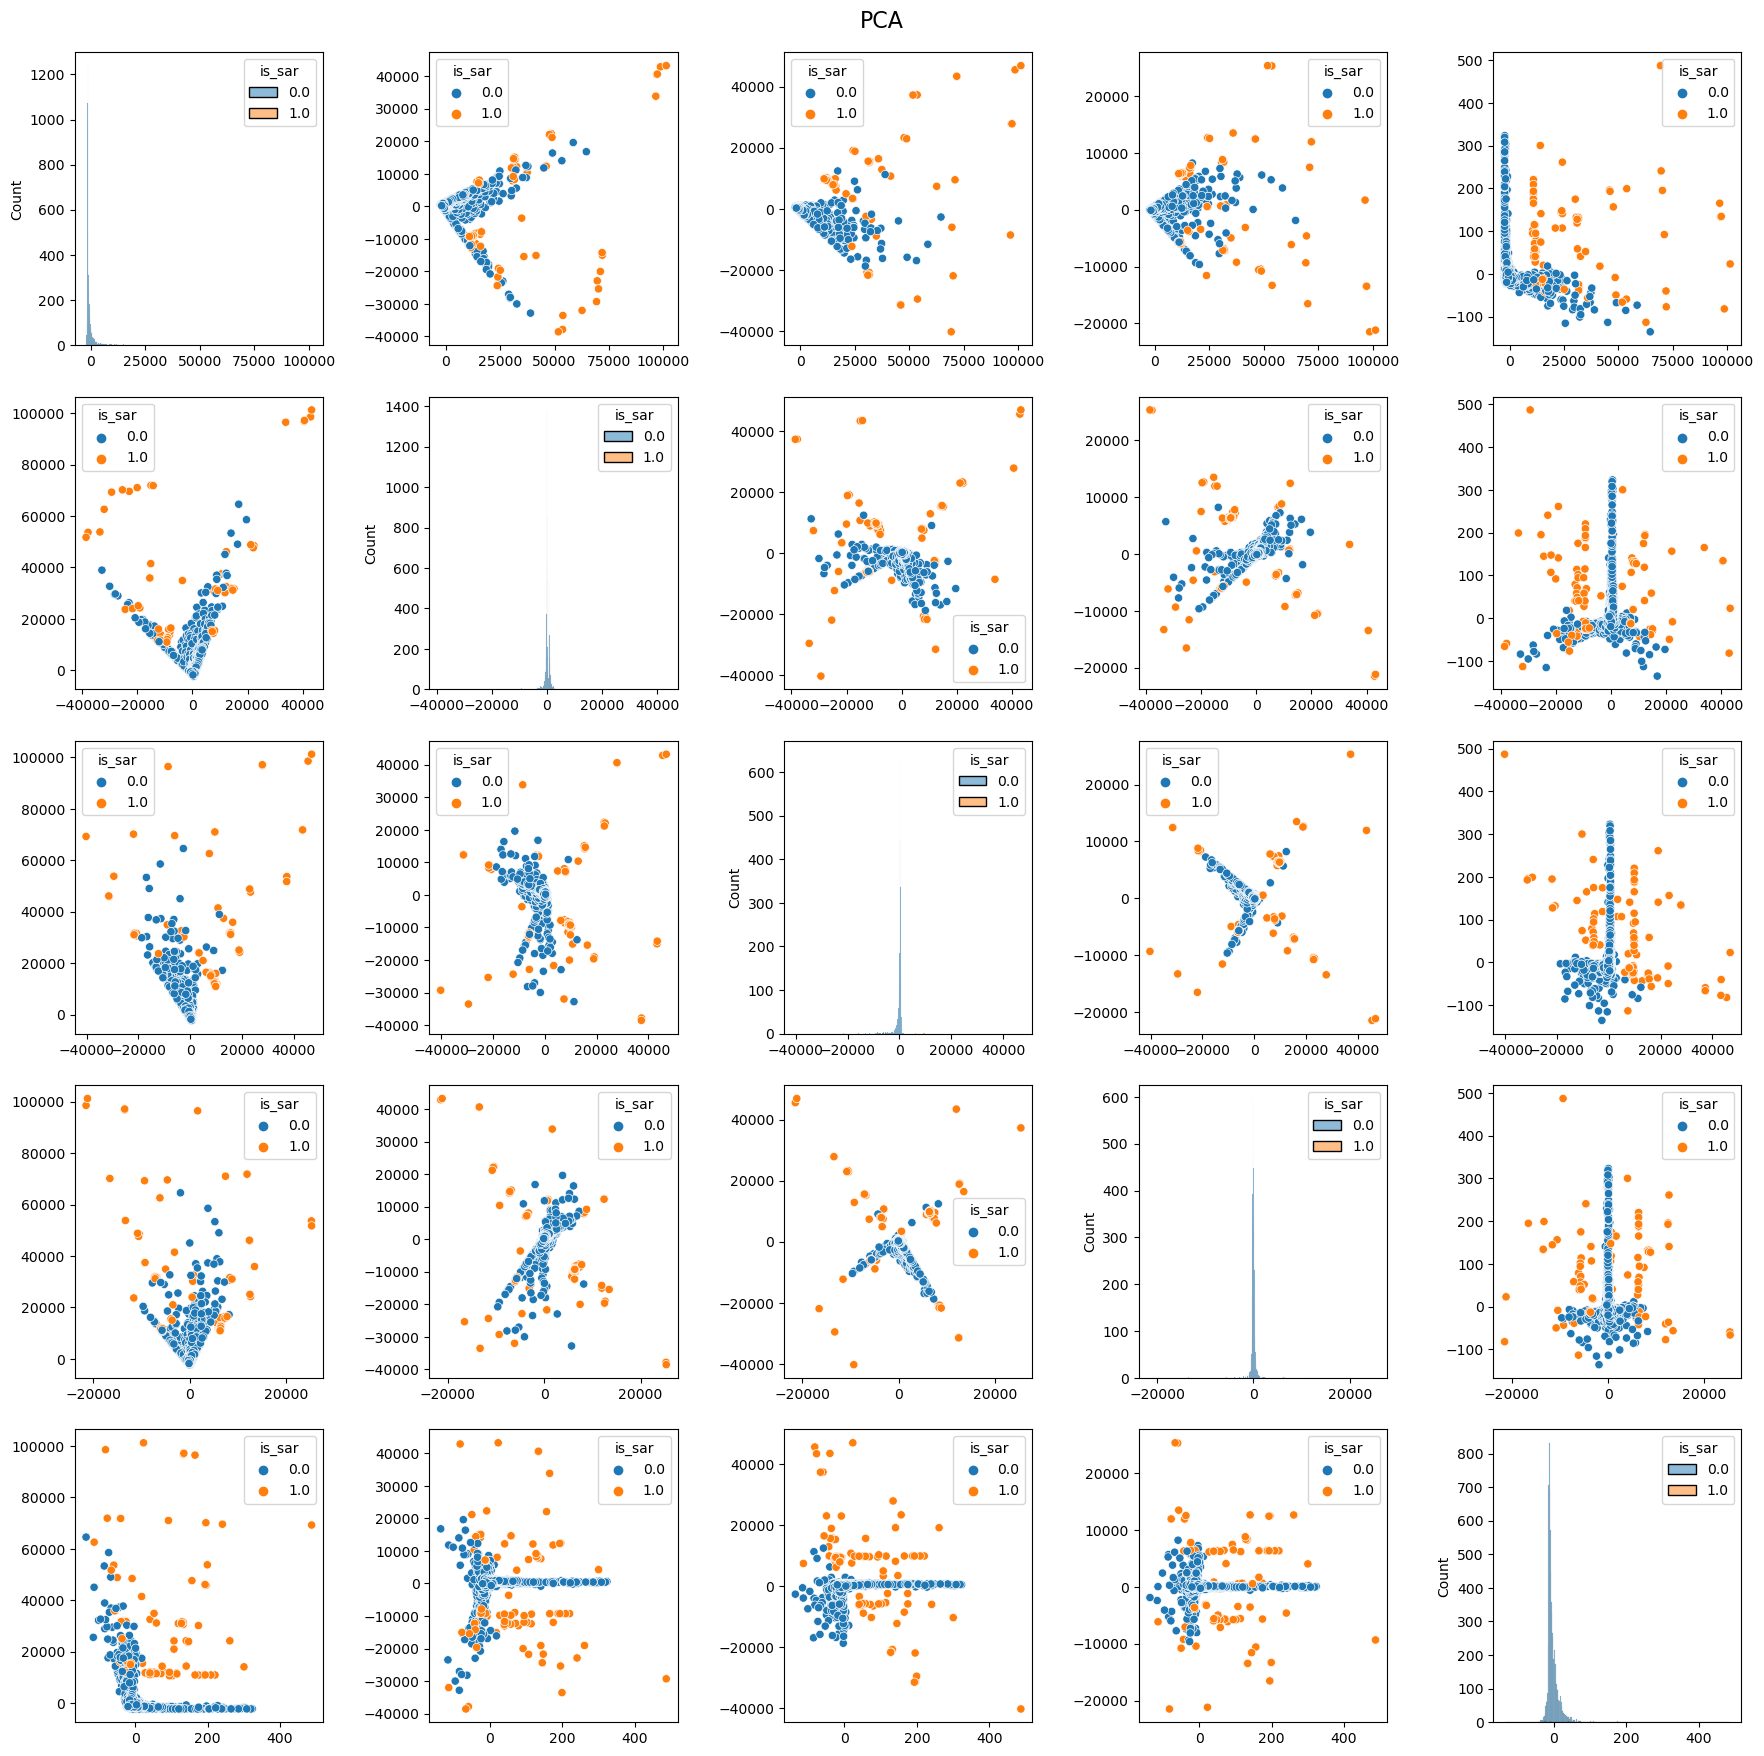

In [8]:
# PCA
n_components = 5 
svd_solver = 'auto'
embedings = PCA(n_components=n_components, svd_solver=svd_solver).fit_transform(df.drop(columns='is_sar'))
fig, axs = plt.subplots(n_components, n_components, figsize=(18, 18))
for i in range(n_components):
    for j in range(n_components):
        if i == j:
            sns.histplot(x=embedings[:, i],  hue=df['is_sar'], ax=axs[i, j])
        else:
            sns.scatterplot(x=embedings[:,i], y=embedings[:,j], hue=df['is_sar'], ax=axs[i, j])

fig.suptitle('PCA', fontsize=16)
plt.tight_layout(pad=2)
plt.show()

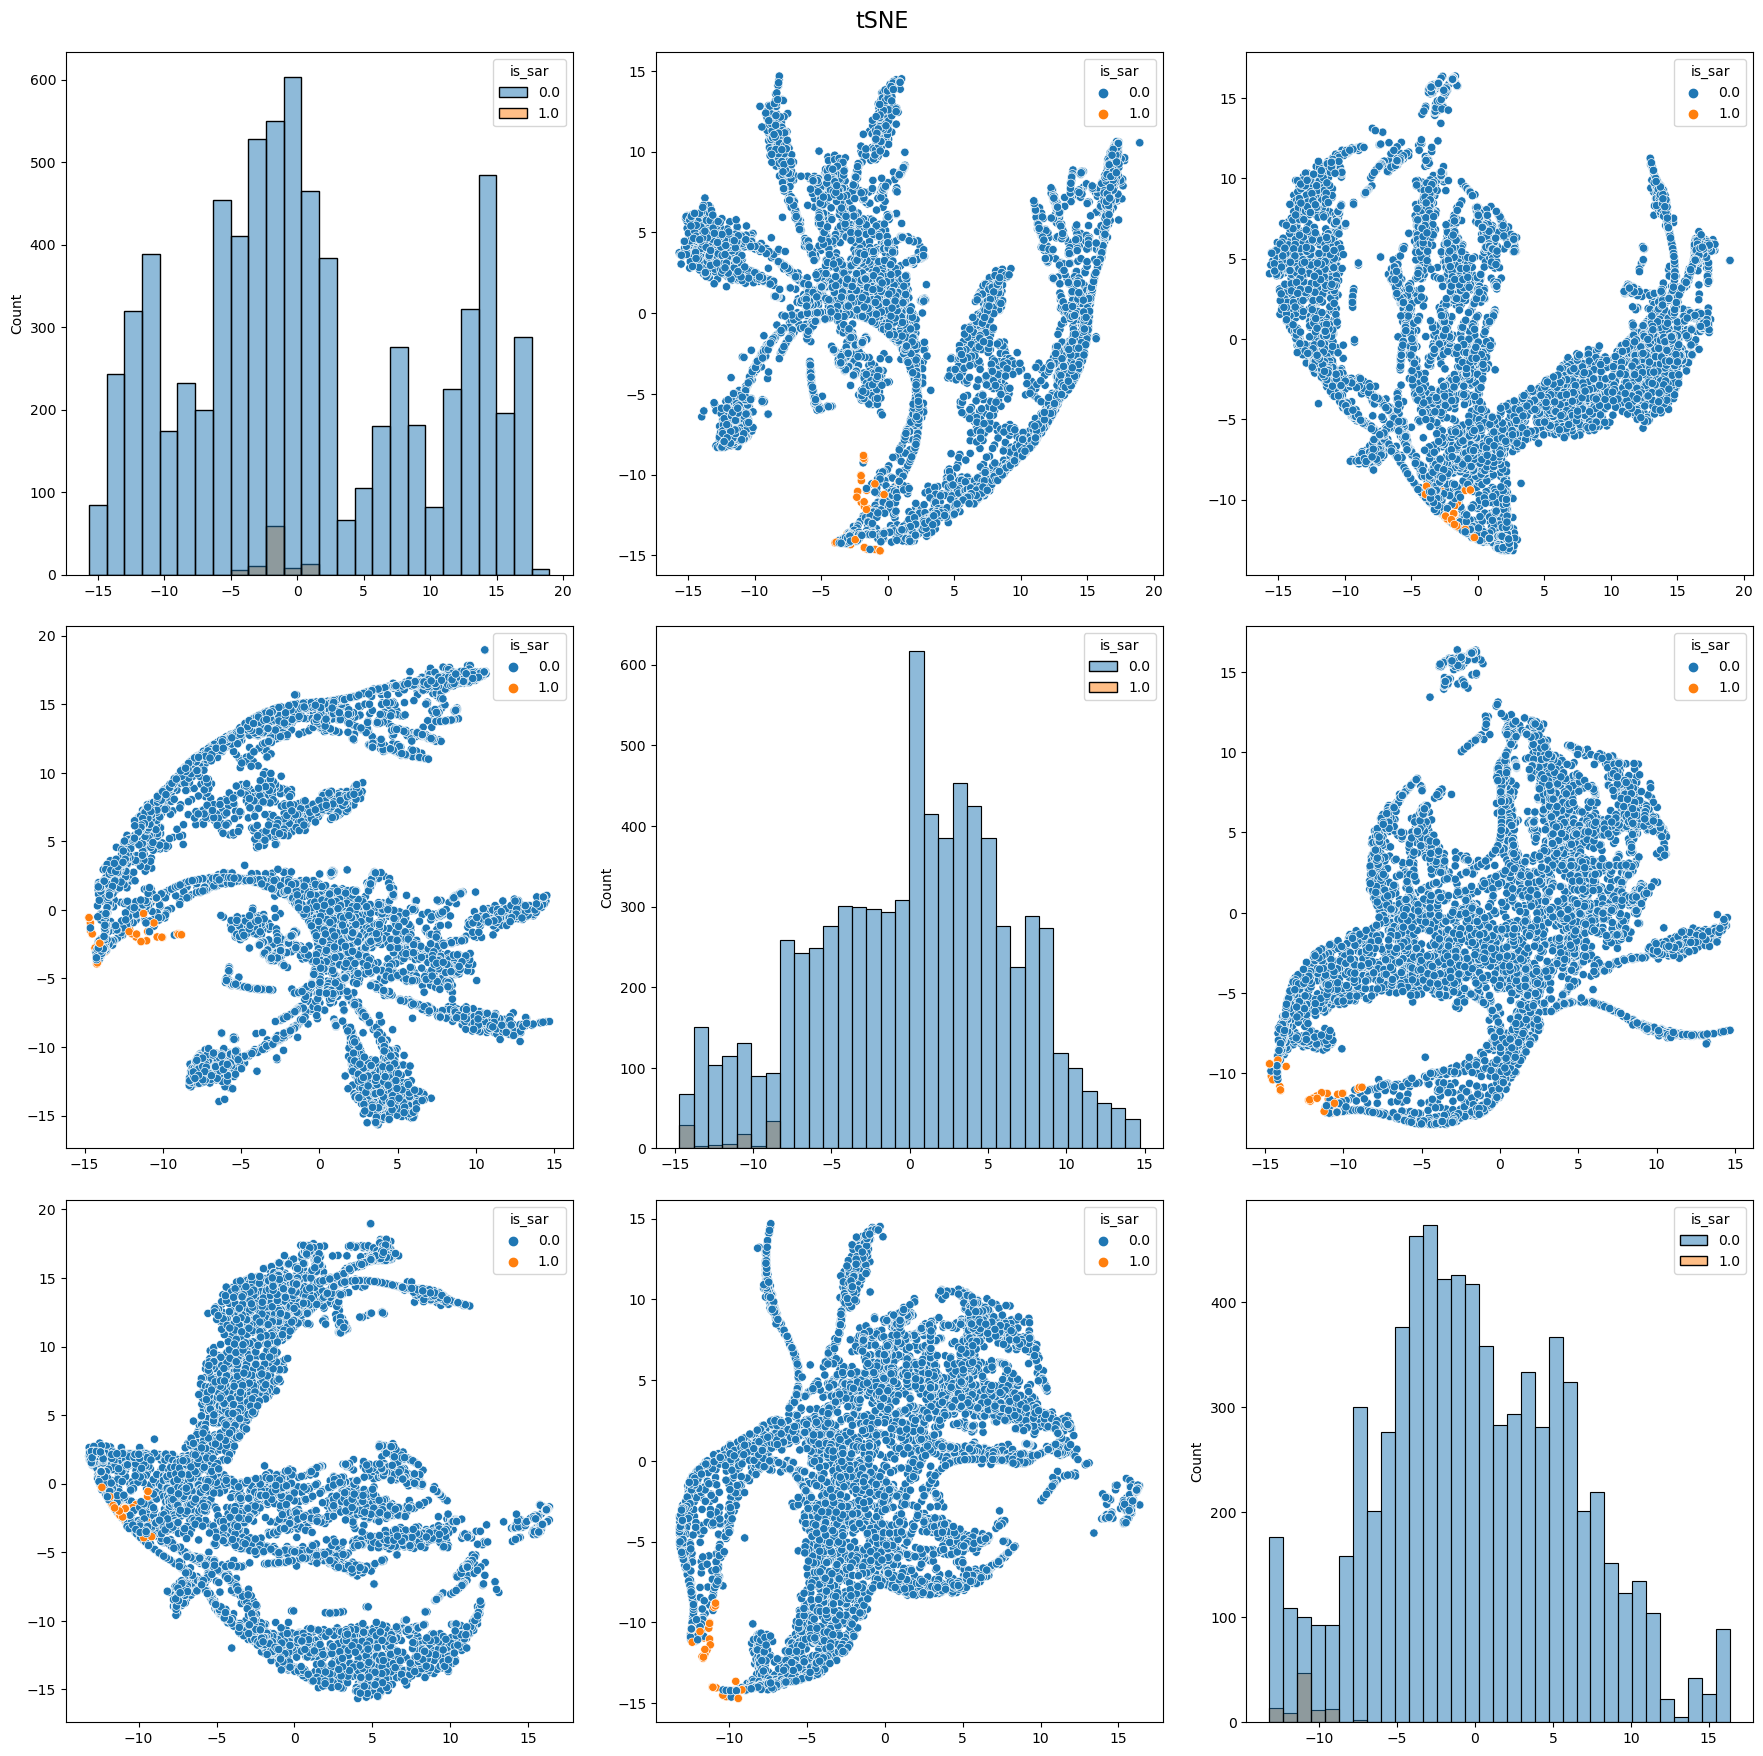

In [9]:
#tSNE
n_components = 3
perplexity = 120
learning_rate = 'auto'
init = 'random'
method = 'barnes_hut'
n_jobs = 8
embedings = TSNE(n_components=n_components, perplexity=perplexity, learning_rate=learning_rate, init=init, method=method, n_jobs=n_jobs).fit_transform(df.drop(columns='is_sar'))

fig, axs = plt.subplots(n_components, n_components, figsize=(18, 18))
for i in range(n_components):
    for j in range(n_components):
        if i == j:
            sns.histplot(x=embedings[:, i],  hue=df['is_sar'], ax=axs[i, j])
        else:
            sns.scatterplot(x=embedings[:,i], y=embedings[:,j], hue=df['is_sar'], ax=axs[i, j])

fig.suptitle('tSNE', fontsize=16)
plt.tight_layout(pad=2)
plt.show()

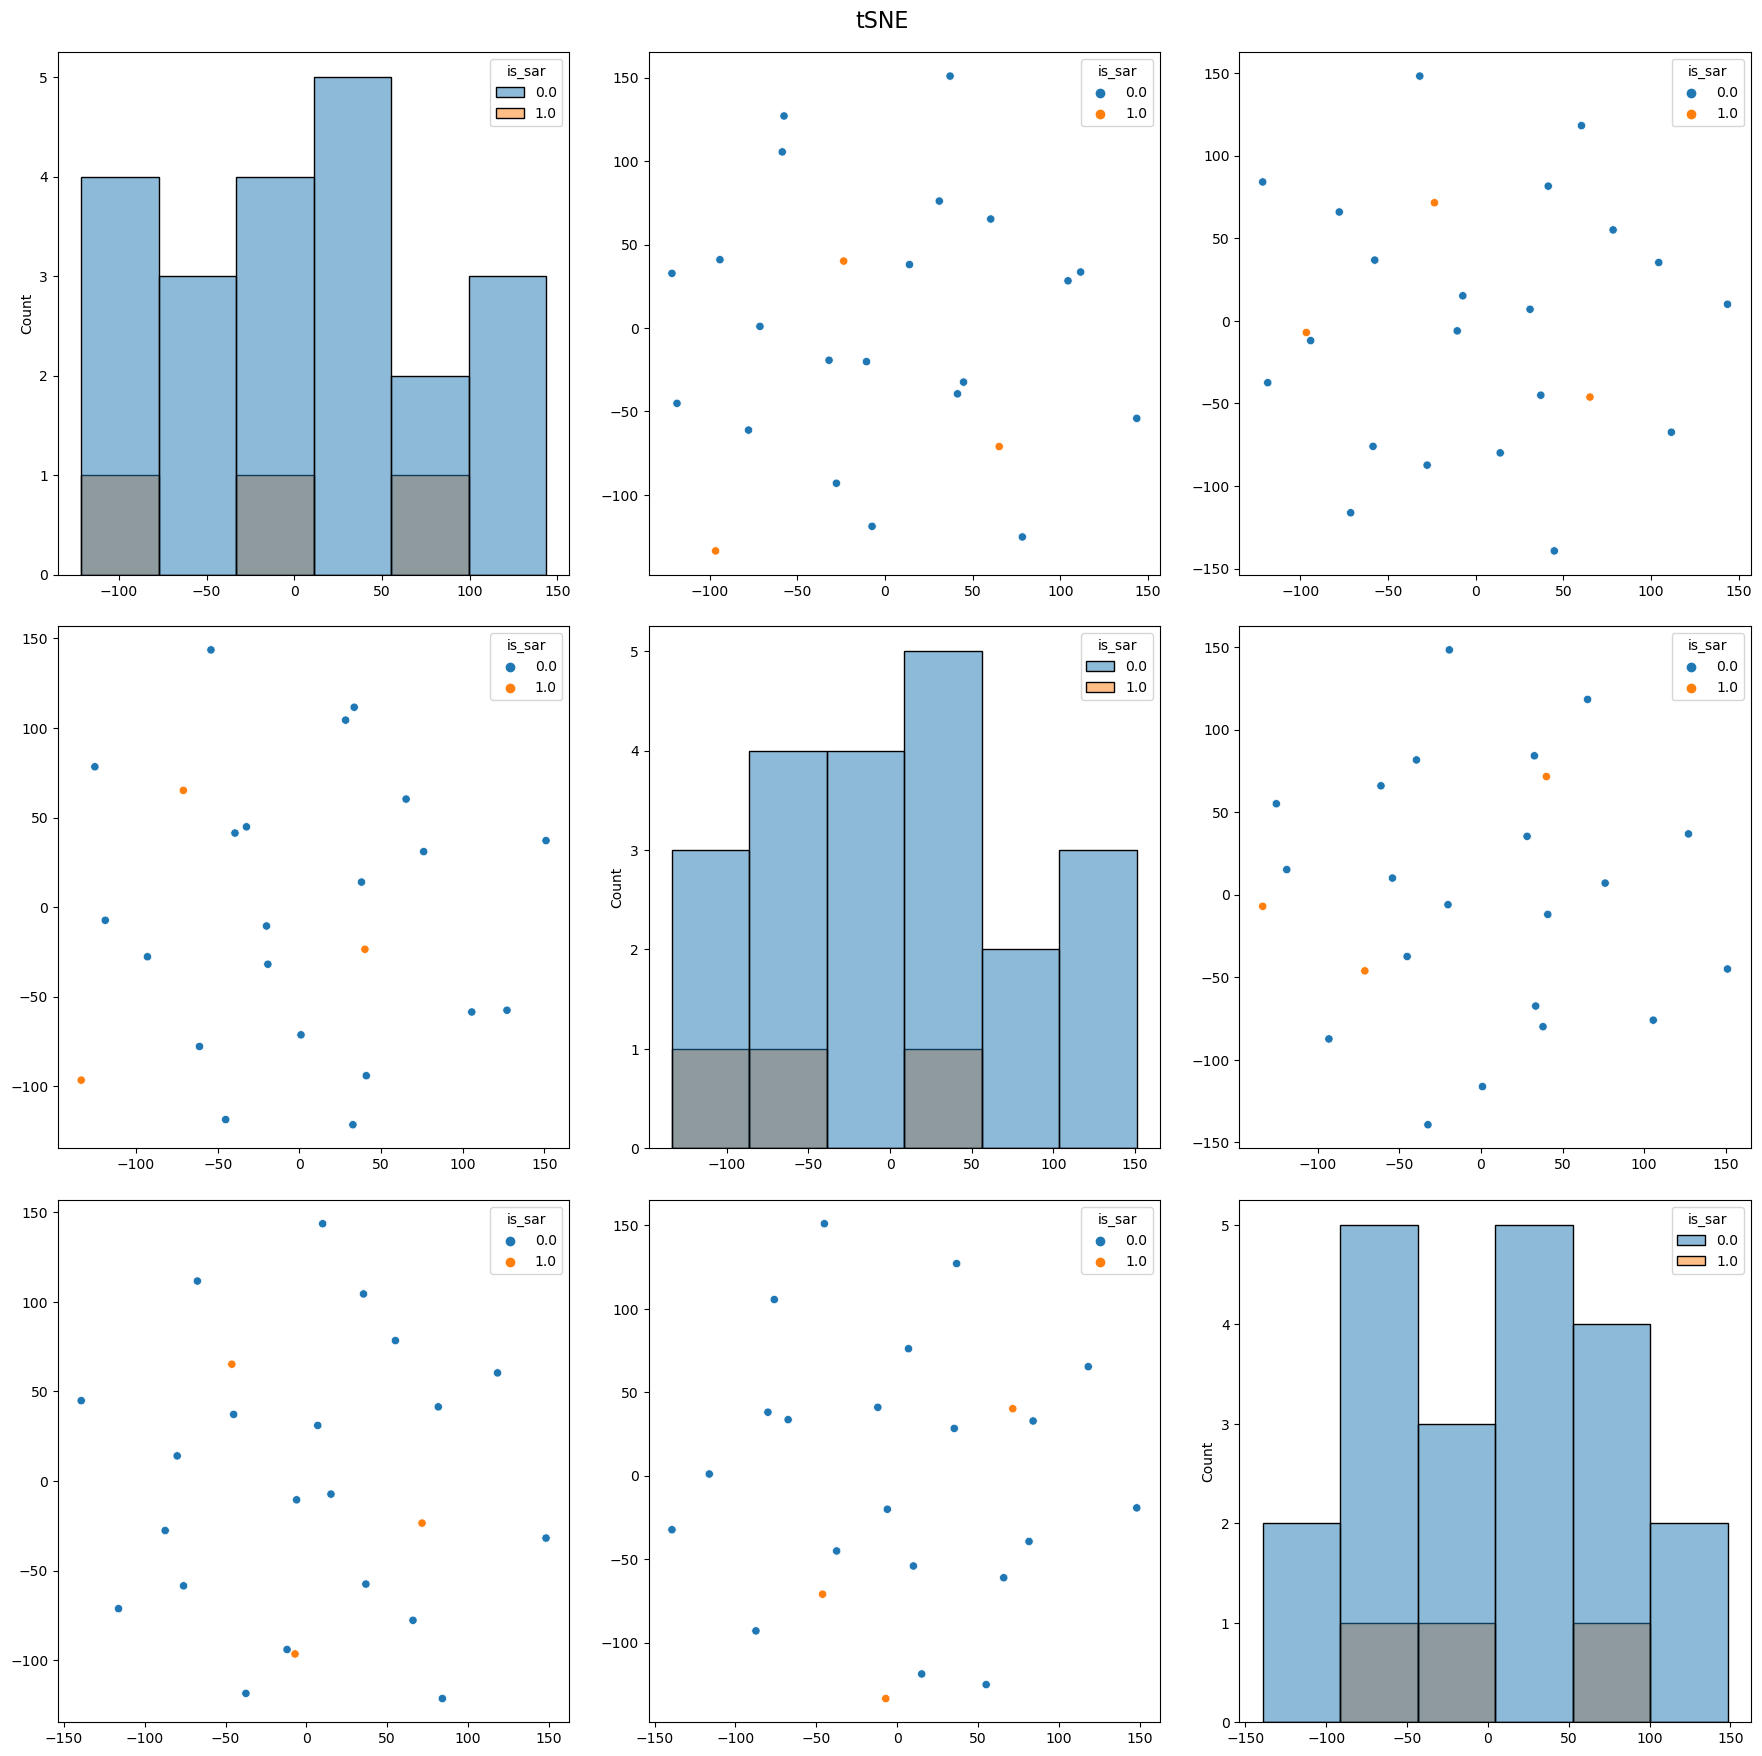

In [10]:
#tSNE
n_components = 3
perplexity = 120
learning_rate = 'auto'
init = 'random'
method = 'barnes_hut'
n_jobs = 8
bank = 'ålandsbanken'
df_iso = pd.read_csv(f'../datasets/{dataset}/{bank}.csv')
embedings = TSNE(n_components=n_components, perplexity=perplexity, learning_rate=learning_rate, init=init, method=method, n_jobs=n_jobs).fit_transform(df_iso.drop(columns='is_sar'))

fig, axs = plt.subplots(n_components, n_components, figsize=(18, 18))
for i in range(n_components):
    for j in range(n_components):
        if i == j:
            sns.histplot(x=embedings[:, i],  hue=df_iso['is_sar'], ax=axs[i, j])
        else:
            sns.scatterplot(x=embedings[:,i], y=embedings[:,j], hue=df_iso['is_sar'], ax=axs[i, j])

fig.suptitle('tSNE', fontsize=16)
plt.tight_layout(pad=2)
plt.show()